In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
path = "/content/drive/MyDrive/dataset/Combine dataset__Heart disease.csv"
df = pd.read_csv(path)
print('Shape of the data is ', df.shape)

Shape of the data is  (4728, 14)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4728 entries, 0 to 4727
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       4725 non-null   float64
 1   Sex       4727 non-null   float64
 2   Cp        4726 non-null   float64
 3   Trestbps  4721 non-null   float64
 4   Chol      4723 non-null   float64
 5   FBS       4721 non-null   float64
 6   RestECG   4724 non-null   float64
 7   Thalach   4719 non-null   float64
 8   Exang     4679 non-null   float64
 9   Oldpeak   4723 non-null   float64
 10  Slope     4726 non-null   float64
 11  Ca        4723 non-null   float64
 12  Thal      303 non-null    float64
 13  Target    303 non-null    float64
dtypes: float64(14)
memory usage: 517.2 KB


In [99]:
print(df['Age'].mode())
print(df['Sex'].mode())
print(df['Cp'].mode())
print(df['Trestbps'].mode())
print(df['FBS'].mode())
print(df['RestECG'].mode())
print(df['Thalach'].mode())
print(df['Exang'].mode())
print(df['Oldpeak'].mode())
print(df['Slope'].mode())
print(df['Ca'].mode())
print(df['Thal'].mode())
print(df['Target'].mode())
print(df['Chol'].mode())

0    58.0
dtype: float64
0    1.0
dtype: float64
0    4.0
dtype: float64
0    120.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    150.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    2.0
dtype: float64
0    1.0
dtype: float64
0    2.0
dtype: float64
0    1.0
dtype: float64
0    0.0
dtype: float64


In [100]:
df['Age'] = df['Age'].replace(np.nan,58.0)
df['Sex'] = df['Sex'].replace(np.nan,1.0)
df['Cp'] = df['Cp'].replace(np.nan,4.0)
df['Trestbps'] = df['Trestbps'].replace(np.nan,120.0)
df['FBS'] = df['FBS'].replace(np.nan,0.0)
df['RestECG'] = df['RestECG'].replace(np.nan,0.0)
df['Thalach'] = df['Thalach'].replace(np.nan,150.0)
df['Exang'] = df['Exang'].replace(np.nan,0.0)
df['Oldpeak'] = df['Oldpeak'].replace(np.nan,0.0)
df['Slope'] = df['Slope'].replace(np.nan,2.0)
df['Ca'] = df['Ca'].replace(np.nan,1.0)
df['Thal'] = df['Thal'].replace(np.nan,2.0)
df['Target'] = df['Target'].replace(np.nan,1.0)
df['Chol'] = df['Chol'].replace(np.nan,0.0)

In [101]:
df.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'FBS', 'RestECG', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [102]:
df.dtypes

Age         float64
Sex         float64
Cp          float64
Trestbps    float64
Chol        float64
FBS         float64
RestECG     float64
Thalach     float64
Exang       float64
Oldpeak     float64
Slope       float64
Ca          float64
Thal        float64
Target      float64
dtype: object

In [103]:
df.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
FBS         0
RestECG     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

In [104]:
df.groupby(["Target"])["Age"].agg(["max","min","mean"])

,max,min,mean
Target,,,
0.0,77.0,35.0,56.601449
1.0,77.0,28.0,54.018083


In [105]:
df.Target.value_counts()

1.0    4590
0.0     138
Name: Target, dtype: int64

In [106]:
df["Sex"] = df["Sex"].map({0:"Female", 1:"Male"})

In [107]:
df.groupby(df["Sex"])["Target"].agg(["value_counts"])

value_counts
Sex    Target              
Female 1.0             1241
       0.0               24
Male   1.0             3349
       0.0              114

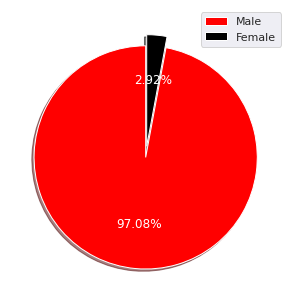

In [108]:
gender = ["Male", "Female"]
values = df["Target"].value_counts()
color = ["#FF0000", "#000000"]

plt.figure(figsize = (5, 7))
plt.pie(values, labels = gender, colors = color, explode = (0.1, 0), textprops = {"color":"w"}, autopct = "%.2f%%", shadow = True, startangle = 90)

plt.legend();

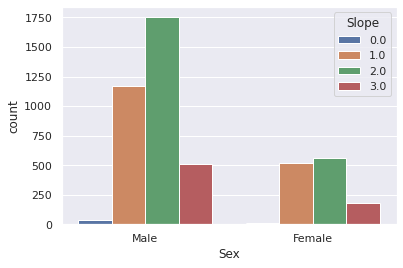

In [109]:
sns.countplot(x = df["Sex"], hue = df["Slope"]);

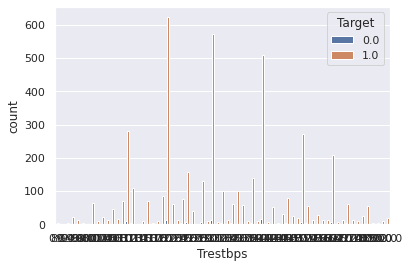

In [110]:
sns.countplot(x = df["Trestbps"],  hue = df["Target"]);
#sns.catplot(x=df["Target"], y=df["Trestbps"],df=df, kind="swarm") 

In [111]:
df.groupby(df["Cp"])["Target"].agg(["value_counts"])

value_counts
Cp  Target              
0.0 1.0              182
    0.0              104
1.0 1.0              763
    0.0                9
2.0 1.0              856
    0.0               18
3.0 1.0             1061
    0.0                7
4.0 1.0             1728

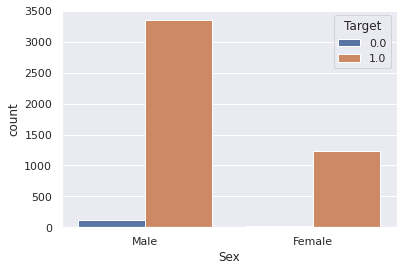

In [112]:
sns.countplot (x = df["Sex"], hue = df["Target"]); #(x = "gender",df = df, hue = "target");

In [113]:
df.groupby("Sex")["Cp"].agg(["value_counts"])

value_counts
Sex    Cp               
Female 3.0           353
       2.0           319
       4.0           311
       1.0           204
       0.0            78
Male   4.0          1417
       3.0           715
       1.0           568
       2.0           555
       0.0           208

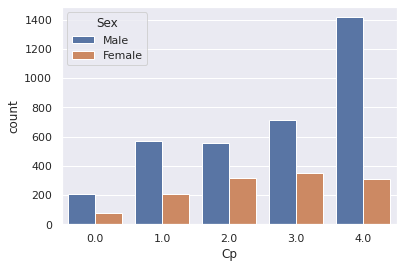

In [114]:
sns.countplot(x =df["Cp"] , hue = df["Sex"]);

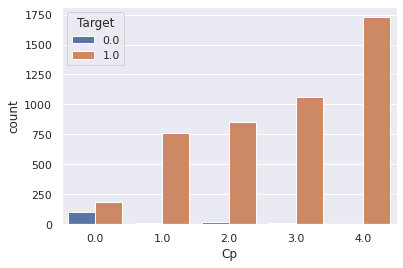

In [115]:
sns.countplot(x = df["Cp"],  hue = df["Target"]);

In [116]:
df.columns = df.columns.str.replace('FBS', ' ')

In [117]:
df.groupby(["Sex"])[' '].agg(["value_counts"])

value_counts
Sex                     
Female 0.0          1101
       1.0           164
Male   0.0          2770
       1.0           693

In [118]:
df.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', ' ', 'RestECG', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

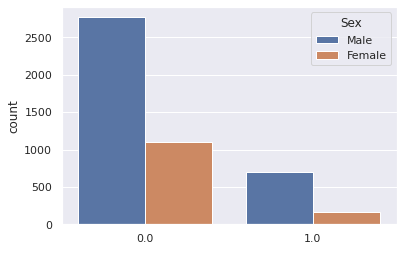

In [119]:
sns.countplot(x = df[' '],  hue = df["Sex"]);



In [120]:
df.groupby(df["RestECG"])["Target"].agg(["count"])

,count
RestECG,
0.0,2543
1.0,1241
2.0,944


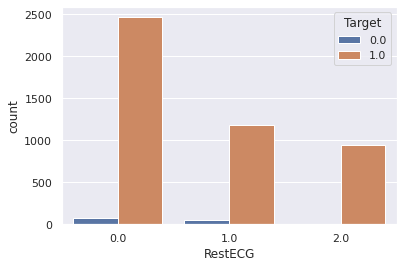

In [121]:
sns.countplot(x = df["RestECG"],  hue = df["Target"]);

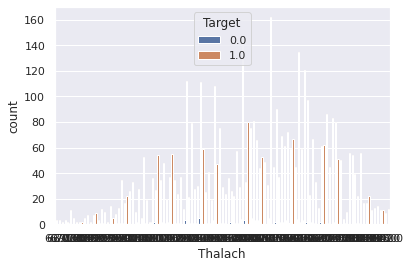

In [122]:
#sns.catplot(x=df["Target"],y=df["Thalach"],kind="swarm")
sns.countplot(x = df["Thalach"],  hue = df["Target"]);

In [123]:
df.groupby(["Sex"])["RestECG"].agg(["value_counts"])

value_counts
Sex    RestECG              
Female 0.0               668
       1.0               323
       2.0               274
Male   0.0              1875
       1.0               918
       2.0               670

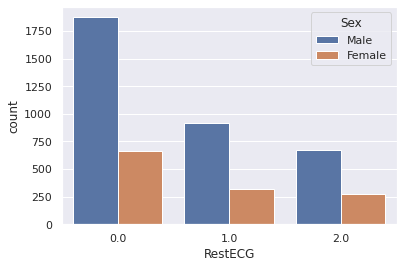

In [124]:
sns.countplot(x = df["RestECG"],  hue = df["Sex"]);

In [125]:
df.groupby(["Sex"])["Exang"].agg(["value_counts"])

value_counts
Sex    Exang              
Female 0.0             974
       1.0             291
Male   0.0            1977
       1.0            1486

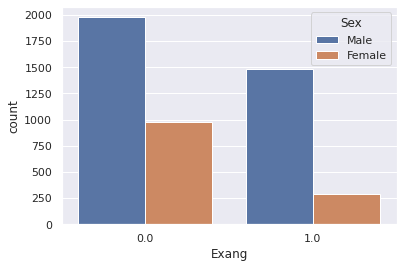

In [126]:
sns.countplot(x = df["Exang"],  hue = df["Sex"]);

In [127]:
df.groupby(["Target"])["Exang"].agg(["value_counts"])

value_counts
Target Exang              
0.0    1.0              76
       0.0              62
1.0    0.0            2889
       1.0            1701

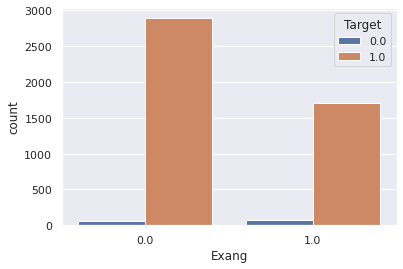

In [128]:

sns.countplot(x = df["Exang"], hue = df["Target"]);



In [129]:
df.groupby(["Sex"])["Ca"].agg(["value_counts"])

value_counts
Sex    Ca               
Female 0.0           738
       1.0           510
       2.0            13
       3.0             4
Male   1.0          1896
       0.0          1521
       2.0            25
       3.0            16
       4.0             5

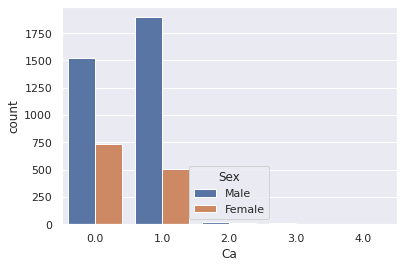

In [130]:
sns.countplot(x = df["Ca"],  hue = df["Sex"]);

In [131]:

df.groupby(["Thal"])["Target"].agg(["value_counts"])

value_counts
Thal Target              
0.0  0.0                1
     1.0                1
1.0  0.0               12
     1.0                6
2.0  1.0             4555
     0.0               36
3.0  0.0               89
     1.0               28

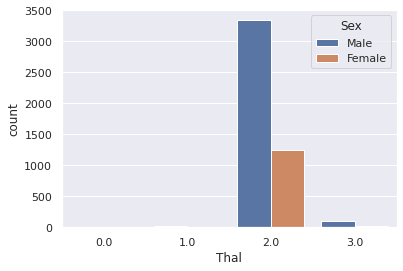

In [132]:
sns.countplot(x = df["Thal"],  hue = df["Sex"]);

In [133]:
df.groupby(["Sex"])["Thal"].agg(["value_counts"])

value_counts
Sex    Thal              
Female 2.0           1248
       3.0             15
       0.0              1
       1.0              1
Male   2.0           3343
       3.0            102
       1.0             17
       0.0              1

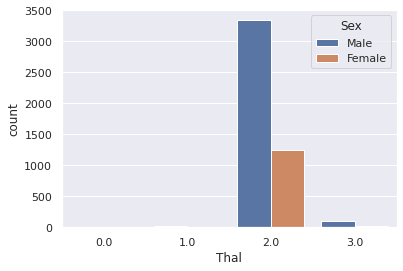

In [134]:
sns.countplot(x = df["Thal"],  hue = df["Sex"]);

In [135]:
df["Target"].agg(["value_counts"])

,value_counts
1.0,4590
0.0,138


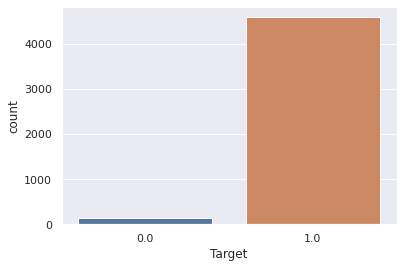

In [136]:
sns.countplot(x = df["Target"]);

In [137]:
print (df["Sex"].unique())

#Replacing Female as 0 and Male as 1 in sex column in the dataset

df["Sex"] = df["Sex"].map({"Female":0, "Male":1})
print (df["Sex"].unique())

['Male' 'Female']
[1 0]


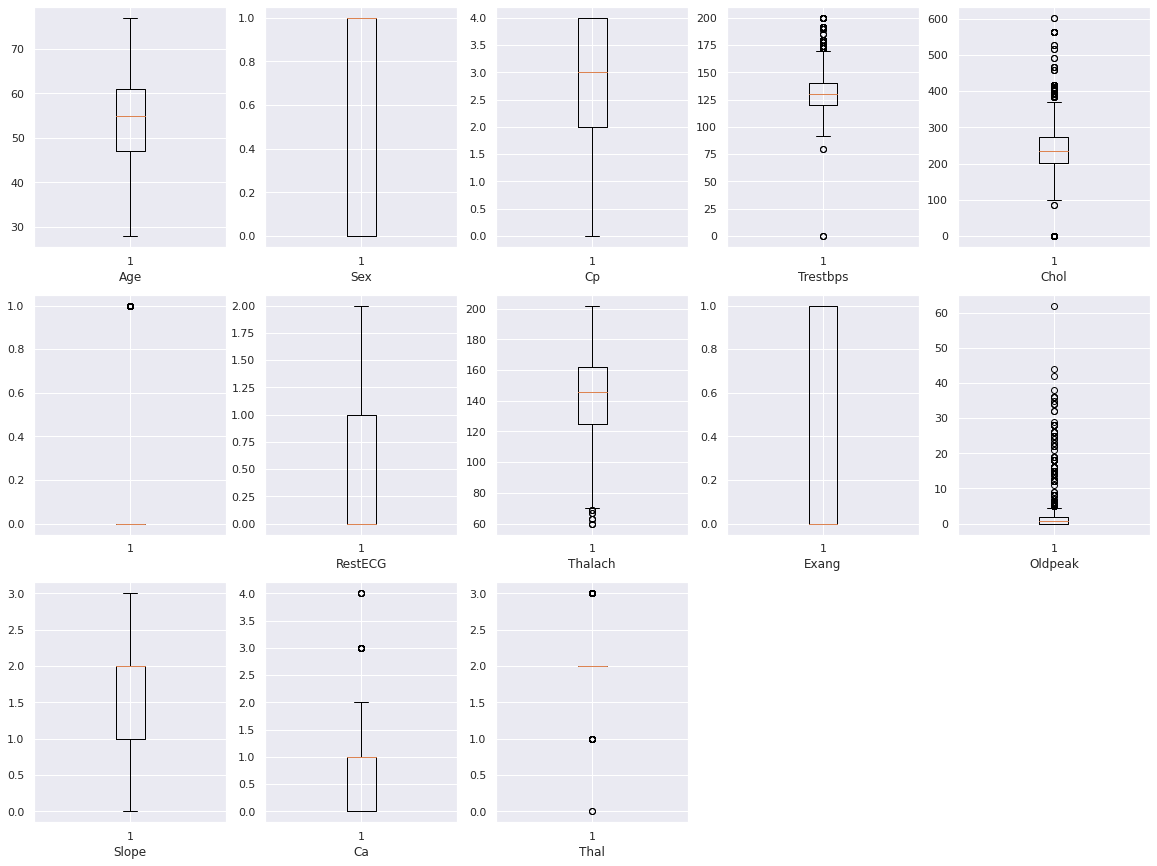

In [138]:
col = 1
plt.figure(figsize = (20, 15))
for i in df.columns:
    if col < 14:
        plt.subplot(3, 5, col)
        plt.boxplot(df[i])
        plt.xlabel(i)
    col = col + 1

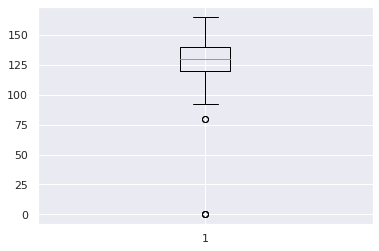

In [139]:
#Removing outliers from the column trestbps
q3=df["Trestbps"].quantile(q=0.75)
q1=df["Trestbps"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=df[df["Trestbps"]>IQR_upper_limit]
df=df[df["Trestbps"]<IQR_upper_limit]
plt.boxplot(df["Trestbps"]);

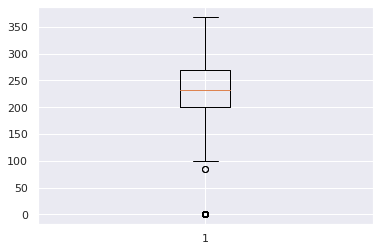

In [140]:
#Removing outliers from the column chol
q3=df["Chol"].quantile(q=0.75)
q1=df["Chol"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=df[df["Chol"]>IQR_upper_limit]
df=df[df["Chol"]<IQR_upper_limit]
plt.boxplot(df["Chol"]);

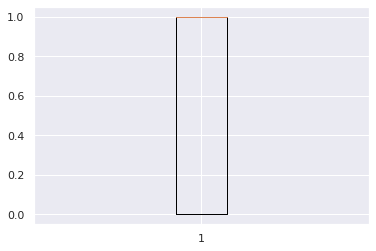

In [141]:
#Removing outliers from the column ca:l
q3=df["Ca"].quantile(q=0.75)
q1=df["Ca"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=df[df["Ca"]>IQR_upper_limit]
df=df[df["Ca"]<IQR_upper_limit]
plt.boxplot(df["Ca"]);

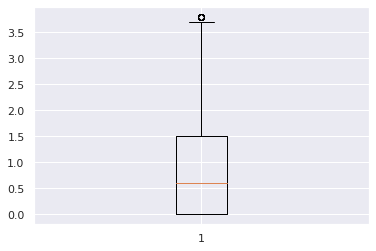

In [142]:
#Removing outliers from the column oldpeak
q3=df["Oldpeak"].quantile(q=0.75)
q1=df["Oldpeak"].quantile(q=0.25)
IQR=q3-q1
IQR_lower_limit=int(q1-1.5*IQR)
IQR_upper_limit=int(q3+1.5*IQR)
k=df[df["Oldpeak"]>IQR_upper_limit]
df=df[df["Oldpeak"]<IQR_upper_limit]
plt.boxplot(df["Oldpeak"]);

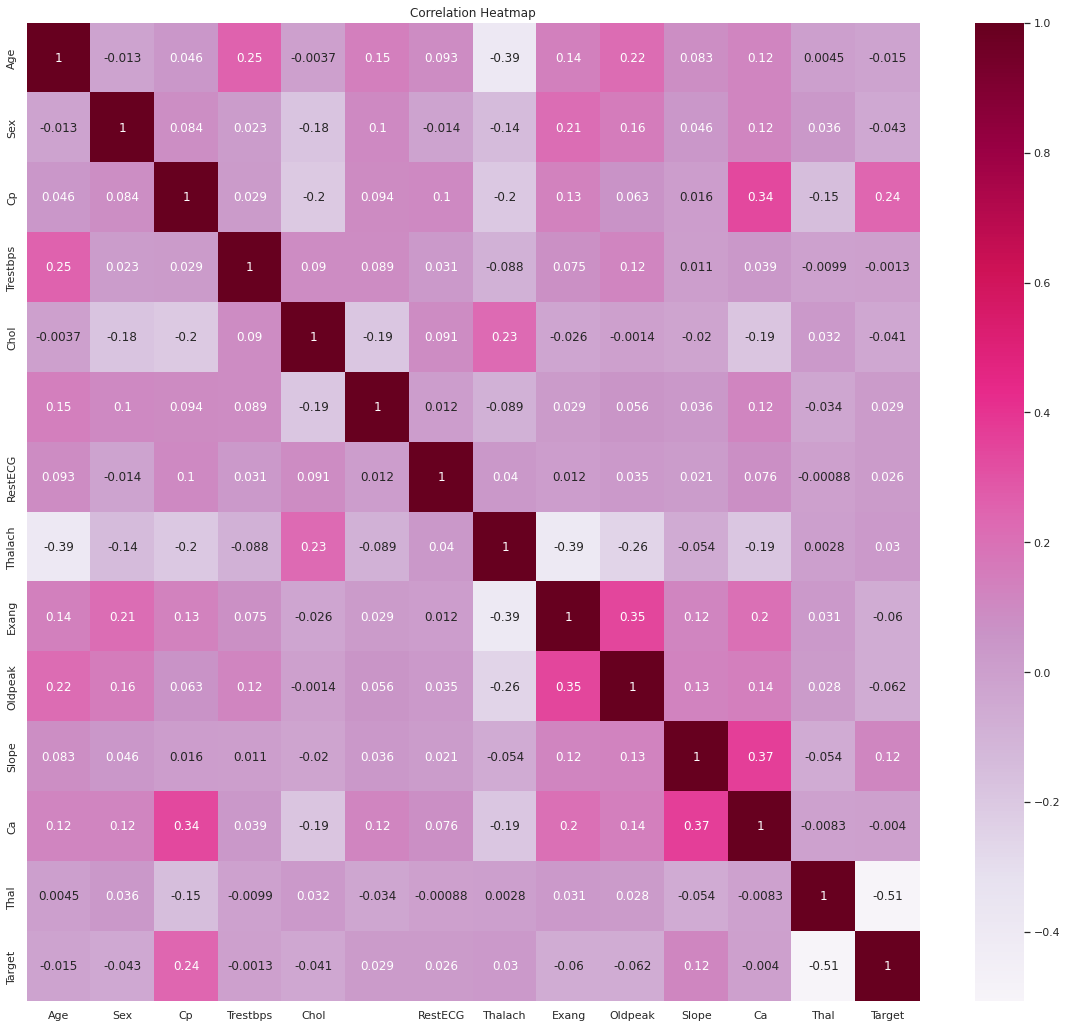

In [143]:
x = df.corr()

plt.figure(figsize = (20, 18))
sns.heatmap(x, annot = True, cmap = 'PuRd')
plt.title("Correlation Heatmap");

In [144]:


x = df.drop(columns = ["Target"])
y = df["Target"]



In [145]:
x_scaled = MinMaxScaler()
x_scaled = x_scaled.fit_transform(x)

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

In [147]:

#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=10)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.20, random_state = 1234)

In [148]:
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1.0    3280
0.0      64
Name: Target, dtype: int64
Distribution of target variable in test set
1.0    819
0.0     18
Name: Target, dtype: int64


In [149]:
print('------------Training Set------------------')
print(x_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(x_test.shape)
print(y_test.shape)

------------Training Set------------------
(3344, 13)
(3344,)
------------Test Set------------------
(837, 13)
(837,)


In [150]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

#x_train[['age','trestbps','chol','thalach','oldpeak']] = scaler.fit_transform(x_train[['age','trestbps','chol','thalach','oldpeak']])
#x_train.head()

In [151]:
#x_test[['age','trestbps','cholestrol','thalach','oldpeak']] = scaler.transform(x_test[['age','trestbps','chol','thalach','oldpeak']])
#x_test.head()

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [153]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)


nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(nb_accuracy)

#matrix = confusion_matrix(y_test, y_pred)
#print(matrix)
print(classification_report(y_test,y_pred_nb))

0.985663082437276
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        18
         1.0       0.99      0.99      0.99       819

    accuracy                           0.99       837
   macro avg       0.83      0.83      0.83       837
weighted avg       0.99      0.99      0.99       837



In [154]:

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred_log = log_reg.predict(x_test)
lr_acc = accuracy_score(y_test, y_pred_log)
print(lr_acc)
f1 = f1_score(y_test, y_pred_log)
print(f1)
mat = confusion_matrix(y_test, y_pred_log)
print(mat)
print(classification_report(y_test,y_pred_log))



0.984468339307049
0.9921259842519685
[[  5  13]
 [  0 819]]
              precision    recall  f1-score   support

         0.0       1.00      0.28      0.43        18
         1.0       0.98      1.00      0.99       819

    accuracy                           0.98       837
   macro avg       0.99      0.64      0.71       837
weighted avg       0.98      0.98      0.98       837



In [155]:
DT= DecisionTreeClassifier(random_state = 10)
parameters = {
'criterion' : ['gini', 'entropy'],
'min_samples_split' : [2,4,6,8],
'min_samples_leaf': [1,2,3,4,5],
}
from sklearn.model_selection import GridSearchCV
grid_search_cv = GridSearchCV(estimator=DT, param_grid=parameters,
                          cv=5, scoring="accuracy", n_jobs =-1)
grid_search_cv.fit(x_scaled, y)
grid_search_cv.best_params_

{'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 2}

In [156]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred_dt = grid_search_cv.predict(x_test)
dt_accuracy = accuracy_score(y_pred_dt,y_test)
print(dt_accuracy)

matrix = confusion_matrix(y_test,y_pred_dt)
print(matrix)
print(classification_report(y_test,y_pred_dt))

0.991636798088411
[[ 14   4]
 [  3 816]]
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80        18
         1.0       1.00      1.00      1.00       819

    accuracy                           0.99       837
   macro avg       0.91      0.89      0.90       837
weighted avg       0.99      0.99      0.99       837



In [157]:
from sklearn.metrics import classification_report,confusion_matrix
RF= RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred_rf = RF.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
print(rf_accuracy)
c_mat= confusion_matrix(y_test,y_pred_rf)
print(c_mat)
print(classification_report(y_test,y_pred_rf))

0.985663082437276
[[ 10   8]
 [  4 815]]
              precision    recall  f1-score   support

         0.0       0.71      0.56      0.63        18
         1.0       0.99      1.00      0.99       819

    accuracy                           0.99       837
   macro avg       0.85      0.78      0.81       837
weighted avg       0.98      0.99      0.98       837



In [158]:
from sklearn.metrics import classification_report,confusion_matrix
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
y_pred_gb = GB.predict(x_test)
gb_accuracy = accuracy_score(y_test,y_pred_gb)
print(gb_accuracy)
confusion_mat= confusion_matrix(y_test,y_pred_gb)
print(confusion_mat)
print(classification_report(y_test,y_pred_gb))

0.985663082437276
[[  9   9]
 [  3 816]]
              precision    recall  f1-score   support

         0.0       0.75      0.50      0.60        18
         1.0       0.99      1.00      0.99       819

    accuracy                           0.99       837
   macro avg       0.87      0.75      0.80       837
weighted avg       0.98      0.99      0.98       837



In [159]:
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)
xg_accuracy = accuracy_score(y_test,y_pred_xgb)
print(xg_accuracy)
c_mat= confusion_matrix(y_test,y_pred_xgb)
print(c_mat)
print(classification_report(y_test,y_pred_xgb))

0.98805256869773
[[ 10   8]
 [  2 817]]
              precision    recall  f1-score   support

         0.0       0.83      0.56      0.67        18
         1.0       0.99      1.00      0.99       819

    accuracy                           0.99       837
   macro avg       0.91      0.78      0.83       837
weighted avg       0.99      0.99      0.99       837



In [160]:
from sklearn.metrics import classification_report,confusion_matrix
AB= AdaBoostClassifier()
AB.fit(x_train,y_train)
y_pred_ab = AB.predict(x_test)
ab_accuracy = accuracy_score(y_test,y_pred_ab)
print(ab_accuracy)
confusion_mat= confusion_matrix(y_test,y_pred_ab)
print(confusion_mat)
print(classification_report(y_test,y_pred_ab))

0.985663082437276
[[ 10   8]
 [  4 815]]
              precision    recall  f1-score   support

         0.0       0.71      0.56      0.63        18
         1.0       0.99      1.00      0.99       819

    accuracy                           0.99       837
   macro avg       0.85      0.78      0.81       837
weighted avg       0.98      0.99      0.98       837



In [161]:
SVM = SVC()
SVM.fit(x_train,y_train)
y_pred_svm = SVM.predict(x_test)
sv_accuracy = accuracy_score(y_test,y_pred_svm)
print(sv_accuracy)
confusion_matrix = confusion_matrix(y_test,y_pred_svm)
print(confusion_matrix)
print(classification_report(y_test,y_pred_svm))

0.984468339307049
[[  5  13]
 [  0 819]]
              precision    recall  f1-score   support

         0.0       1.00      0.28      0.43        18
         1.0       0.98      1.00      0.99       819

    accuracy                           0.98       837
   macro avg       0.99      0.64      0.71       837
weighted avg       0.98      0.98      0.98       837



In [162]:
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
kn_accuracy = accuracy_score(y_test,y_pred_knn)
print(kn_accuracy)
print(classification_report(y_test,y_pred_knn))

0.982078853046595
              precision    recall  f1-score   support

         0.0       1.00      0.17      0.29        18
         1.0       0.98      1.00      0.99       819

    accuracy                           0.98       837
   macro avg       0.99      0.58      0.64       837
weighted avg       0.98      0.98      0.98       837



In [163]:
# --- Applying ET ---
from sklearn.ensemble import ExtraTreesClassifier
ETclassifier = ExtraTreesClassifier(n_estimators=15, random_state=47)
ETclassifier.fit(x_train,y_train)
y_pred_ET = ETclassifier.predict(x_test)

ET_accuracy = accuracy_score(y_pred_ET, y_test)

print(ET_accuracy )
print(classification_report(y_test,y_pred_ET))


0.986857825567503
              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69        18
         1.0       0.99      0.99      0.99       819

    accuracy                           0.99       837
   macro avg       0.85      0.83      0.84       837
weighted avg       0.99      0.99      0.99       837



In [164]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf_MLP = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf_MLP.fit(x_train,y_train)

Iteration 1, loss = 0.14622538
Iteration 2, loss = 0.10160130
Iteration 3, loss = 0.08780095
Iteration 4, loss = 0.08462777
Iteration 5, loss = 0.08013757
Iteration 6, loss = 0.07572345
Iteration 7, loss = 0.07122741
Iteration 8, loss = 0.06634208
Iteration 9, loss = 0.06149717
Iteration 10, loss = 0.06001320
Iteration 11, loss = 0.05776201
Iteration 12, loss = 0.05666979
Iteration 13, loss = 0.05504803
Iteration 14, loss = 0.05425301
Iteration 15, loss = 0.05384060
Iteration 16, loss = 0.05330066
Iteration 17, loss = 0.05247199
Iteration 18, loss = 0.05151493
Iteration 19, loss = 0.05142393
Iteration 20, loss = 0.05284131
Iteration 21, loss = 0.05174655
Iteration 22, loss = 0.04987489
Iteration 23, loss = 0.05051956
Iteration 24, loss = 0.04986338
Iteration 25, loss = 0.04904806
Iteration 26, loss = 0.04875414
Iteration 27, loss = 0.04832708
Iteration 28, loss = 0.04818102
Iteration 29, loss = 0.04786283
Iteration 30, loss = 0.04728124
Iteration 31, loss = 0.04984553
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [165]:
# Make prediction on test dataset
y_pred_MLP=clf_MLP.predict(x_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
MLP_accuracy = accuracy_score(y_test,y_pred_MLP)

print(MLP_accuracy )
print(classification_report(y_test,y_pred_MLP))


0.989247311827957
              precision    recall  f1-score   support

         0.0       1.00      0.50      0.67        18
         1.0       0.99      1.00      0.99       819

    accuracy                           0.99       837
   macro avg       0.99      0.75      0.83       837
weighted avg       0.99      0.99      0.99       837



In [166]:

Evaluation = pd.DataFrame({'Ml': [ "Decision Tree", 'Random Forest',"Extra tree classifer","Gradient Boosting",
                                     "Xg boost classifier","Support Vector Machine",'MLP',"Ada boost classifier"], 
                          'Accuracy': [dt_accuracy*100,rf_accuracy*100,  ET_accuracy*100, gb_accuracy*100,
                                       xg_accuracy*100,
                                     sv_accuracy*100,MLP_accuracy*100, ab_accuracy*100]})
Evaluation

,Ml,Accuracy
0,Decision Tree,99.163680
1,Random Forest,98.566308
2,Extra tree classifer,98.685783
3,Gradient Boosting,98.566308
4,Xg boost classifier,98.805257
5,Support Vector Machine,98.446834
6,MLP,98.924731
7,Ada boost classifier,98.566308


In [167]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = DT, X = x_train, y = y_train, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))



Accuracy: 98.24 %
Standard Deviation: 1.13 %


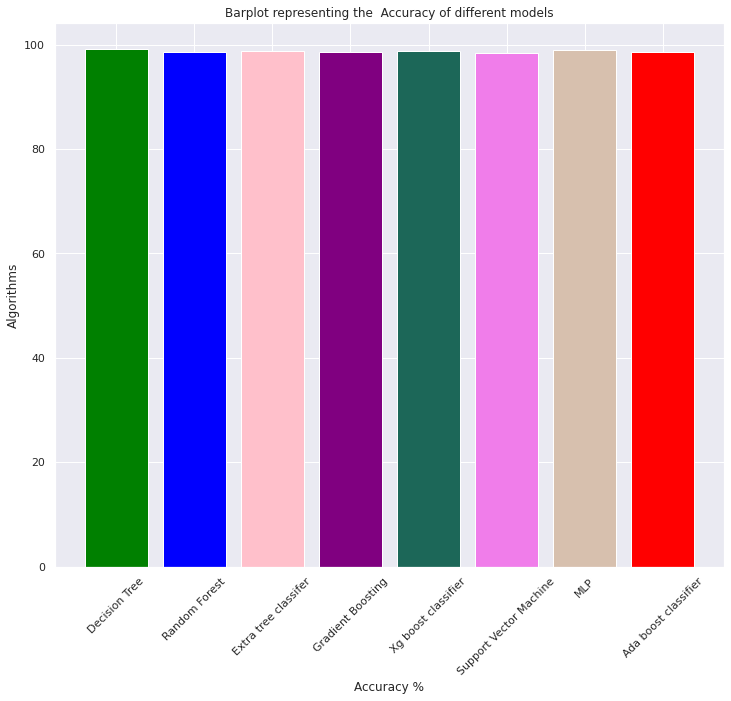

In [168]:
colors = ['green','blue','pink','purple',"#1C6758",'#F07DEA','#D7C0AE','red','black','orange',"yellow",]
plt.figure(figsize=(12,10))
plt.title("Barplot representing the  Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(Evaluation['Ml'],Evaluation['Accuracy'],color = colors)
plt.xticks(rotation = 45)
plt.show()

In [169]:
# Predicted values
y_pred_nb = nb.predict(x_test)
y_pred_log = log_reg.predict(x_test)
y_pred_MLP=clf_MLP.predict(x_test)
y_pred_ET = ETclassifier.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_dt = grid_search_cv.predict(x_test)
y_pred_rf = RF.predict(x_test)
y_pred_svm = SVM.predict(x_test)
y_pred_ab = AB.predict(x_test)
y_pred_xgb = xgb.predict(x_test)
y_pred_gb = GB.predict(x_test)


In [170]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_svm = confusion_matrix(y_test,y_pred_svm)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_ada = confusion_matrix(y_test,y_pred_ab)
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
cm_dt = confusion_matrix(y_test,y_pred_dt)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_gd = confusion_matrix(y_test,y_pred_gb)
cm_mlp = confusion_matrix(y_test,y_pred_MLP)
cm_ET = confusion_matrix(y_test,y_pred_ET)

cm_log = confusion_matrix(y_test,y_pred_log)


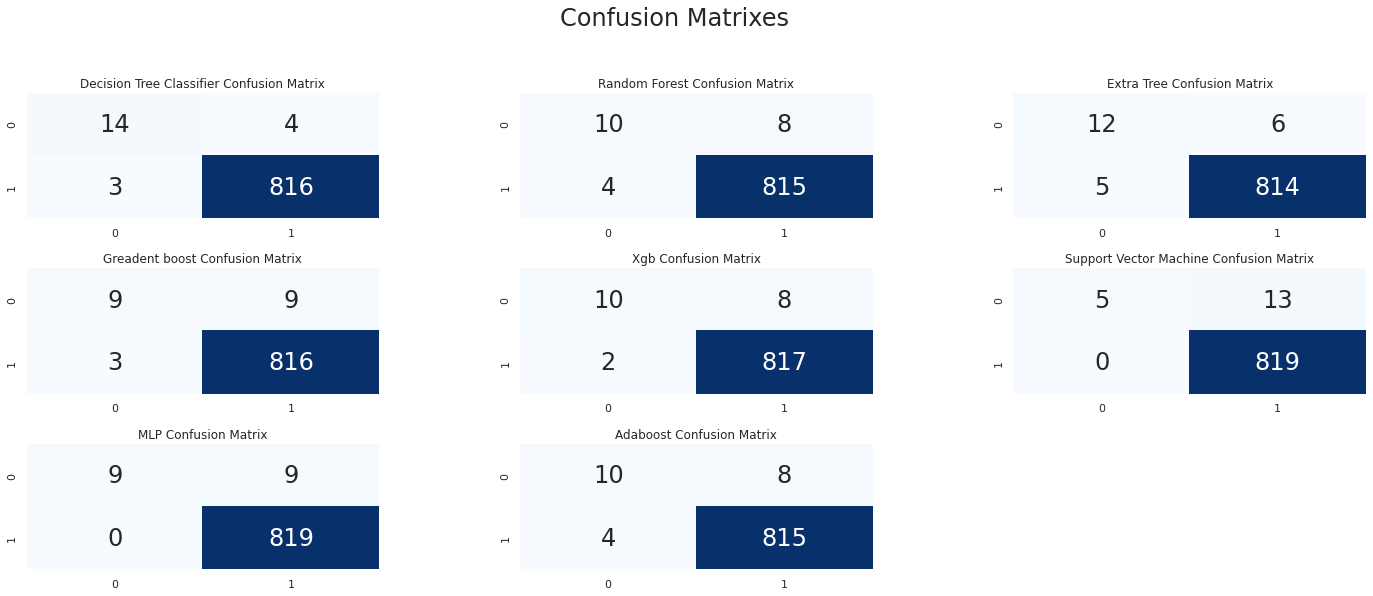

In [171]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

#plt.subplot(4,3,1)
#plt.title("Logistic Regression Confusion Matrix")
#sns.heatmap(cm_log,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

#plt.subplot(4,3,2)
#plt.title("K Nearest Neighbors Confusion Matrix")
#sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,6)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

#plt.subplot(4,3,4)
#plt.title("Naive Bayes Confusion Matrix")
#sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,1)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,2)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,5)
plt.title("Xgb Confusion Matrix")
sns.heatmap(cm_xgb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,4)
plt.title("Greadent boost Confusion Matrix")
sns.heatmap(cm_gd,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,8)
plt.title("Adaboost Confusion Matrix")
sns.heatmap(cm_ada,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,7)
plt.title("MLP Confusion Matrix")
sns.heatmap(cm_mlp,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(4,3,3)
plt.title("Extra Tree Confusion Matrix")
sns.heatmap(cm_ET,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

,Model,Accuracy,ROC,Precision,Sensitivity,Specificity,F1 Score
0,Random Forest,0.985663,0.990279,0.995116,0.555556,0.992692,0.775336


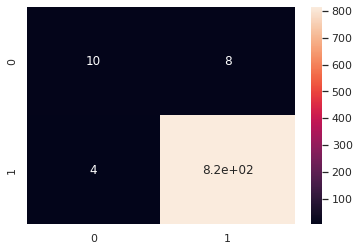

In [172]:
CM=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, y_pred_rf)
roc=roc_auc_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

mathew = matthews_corrcoef(y_test, y_pred_rf)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc]],
               columns = ['Model', 'Accuracy','ROC','Precision', 'Sensitivity','Specificity', 'F1 Score'])

model_results

,Model,Accuracy,ROC,Precision,Recall,F1 Score
0,MLP classifier,0.989247,0.75,0.98913,1.0,0.994536


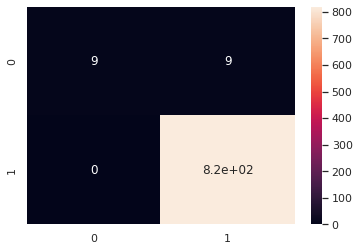

In [173]:
CM=confusion_matrix(y_test,y_pred_MLP )
sns.heatmap(CM, annot=True)


                                       #y_pred_xgb, y_pred_svm,
                                     
                                    # Xg boost classifier Support Vector Machine   

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)

acc= accuracy_score(y_test, y_pred_MLP   )
roc=roc_auc_score(y_test, y_pred_MLP   )
prec = precision_score(y_test, y_pred_MLP )
rec = recall_score(y_test, y_pred_MLP )
f1 = f1_score(y_test, y_pred_MLP )

mathew = matthews_corrcoef(y_test, y_pred_MLP )
model_results =pd.DataFrame([['MLP classifier',acc,roc,prec,rec,f1]],
               columns = ['Model', 'Accuracy','ROC','Precision', 'Recall','F1 Score'])

model_results

In [174]:
data = {"Decision Tree": y_pred_dt, 
'Random Forest': y_pred_rf,
"Extra tree classifer": y_pred_ET,
"Gradient Boosting": y_pred_gb,
                                     
"eXtreme Gradient Boost": y_pred_xgb,
"Support Vector Machine": y_pred_svm,
'MLP classifier': y_pred_MLP,
"Ada boost classifier": y_pred_ab}


model_s = pd.DataFrame(data)

In [175]:
for column in model_s:
    
    acc= accuracy_score(y_test, model_s[column])
    roc=roc_auc_score(y_test, model_s[column])
    prec = precision_score(y_test, model_s[column])
    Recal = recall_score(y_test, model_s[column])
    f1 = f1_score(y_test, model_s[column])
    
   
    results =pd.DataFrame([[column,roc,acc, prec,Recal, f1]],
               columns = ['Model','ROC', 'Accuracy','Precision', 'Recall', 'F1 Score'])
    model_results = model_results.append(results, ignore_index = True)

model_results

,Model,Accuracy,ROC,Precision,Recall,F1 Score
0,MLP classifier,0.989247,0.750000,0.989130,1.000000,0.994536
1,Decision Tree,0.991637,0.887057,0.995122,0.996337,0.995729
2,Random Forest,0.985663,0.775336,0.990279,0.995116,0.992692
3,Extra tree classifer,0.986858,0.830281,0.992683,0.993895,0.993289
4,Gradient Boosting,0.985663,0.748168,0.989091,0.996337,0.992701
5,eXtreme Gradient Boost,0.988053,0.776557,0.990303,0.997558,0.993917
6,Support Vector Machine,0.984468,0.638889,0.984375,1.000000,0.992126
7,MLP classifier,0.989247,0.750000,0.989130,1.000000,0.994536
8,Ada boost classifier,0.985663,0.775336,0.990279,0.995116,0.992692


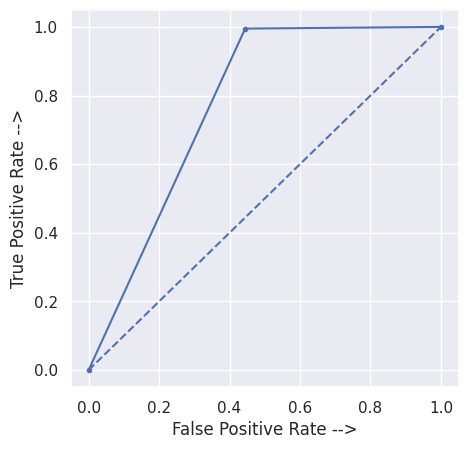

In [176]:
from sklearn.metrics import roc_curve, auc
RandomForest_fpr, RandomForest_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_RandomForest = auc(RandomForest_fpr, RandomForest_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(RandomForest_fpr, RandomForest_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_RandomForest)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
#plt.legend()
plt.show()

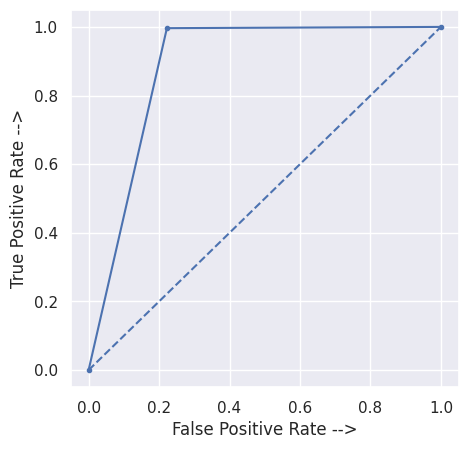

In [177]:
from sklearn.metrics import roc_curve, auc
DecisionTree_fpr, DecisionTree_tpr, threshold = roc_curve(y_test, y_pred_dt)
auc_DecisionTree = auc(DecisionTree_fpr, DecisionTree_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(DecisionTree_fpr, DecisionTree_tpr, marker='.', label='Decision Tree (auc = %0.3f)' % auc_DecisionTree)
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
#plt.legend()
plt.show()

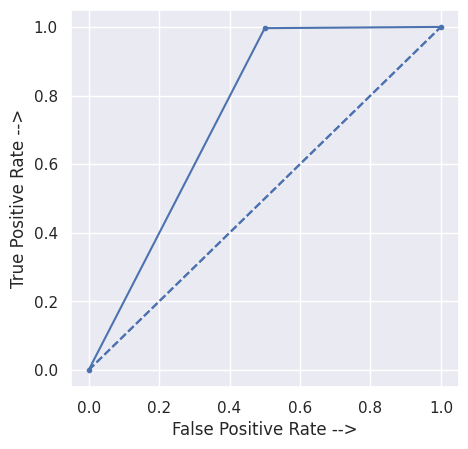

In [178]:
from sklearn.metrics import roc_curve, auc
GradientBoosting_fpr, GradientBoosting_tpr, threshold = roc_curve(y_test, y_pred_gb)
auc_GradientBoosting = auc(GradientBoosting_fpr, GradientBoosting_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(GradientBoosting_fpr, GradientBoosting_tpr, marker='.', label='Gradient Boosting (auc = %0.3f)' % auc_GradientBoosting)   
plt.plot([0,1],[0,1],'b--')
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
#plt.legend()
plt.show()

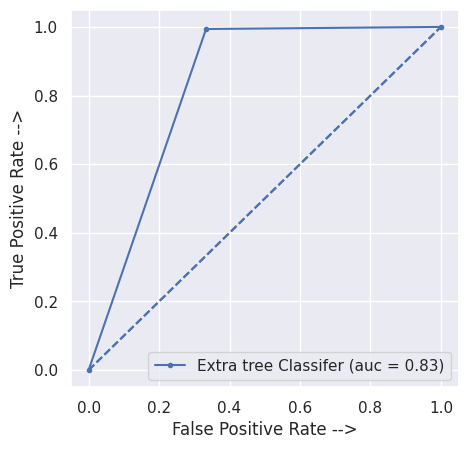

In [179]:
from sklearn.metrics import roc_curve, auc
ExtratreeClassifer_fpr, ExtratreeClassifer_tpr, threshold = roc_curve(y_test, y_pred_ET)
auc_ExtratreeClassifer = auc(ExtratreeClassifer_fpr, ExtratreeClassifer_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(ExtratreeClassifer_fpr, ExtratreeClassifer_tpr, marker='.', label='Extra tree Classifer (auc = %0.2f)' % auc_ExtratreeClassifer)  
   
plt.plot([0,1],[0,1],'b--')
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

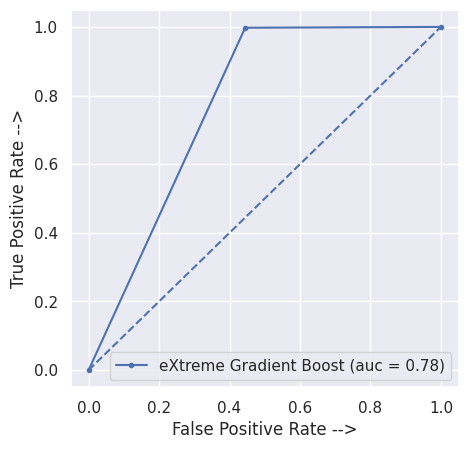

In [180]:
from sklearn.metrics import roc_curve, auc
eXtremeGradientBoost_fpr, eXtremeGradientBoost_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_eXtremeGradientBoost = auc(eXtremeGradientBoost_fpr, eXtremeGradientBoost_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(eXtremeGradientBoost_fpr, eXtremeGradientBoost_tpr, marker='.', label='eXtreme Gradient Boost (auc = %0.2f)' % auc_eXtremeGradientBoost) 
                                     
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

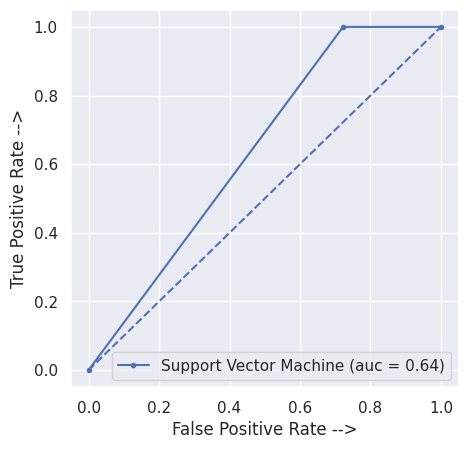

In [181]:
from sklearn.metrics import roc_curve, auc
SupportVectorMachine_fpr, SupportVectorMachine_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_SupportVectorMachine = auc(SupportVectorMachine_fpr, SupportVectorMachine_tpr)
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(SupportVectorMachine_fpr, SupportVectorMachine_tpr, marker='.', label='Support Vector Machine (auc = %0.2f)' % auc_SupportVectorMachine)  

plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

0.75


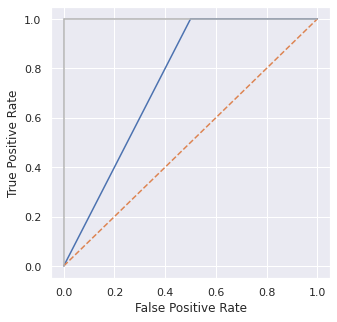

In [182]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_pred_MLP)
auc=roc_auc_score(y_test, y_pred_MLP)
print(auc)
plt.subplots(1, figsize=(5,5))

plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

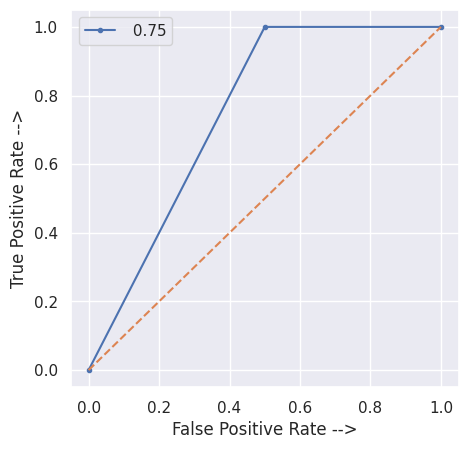

In [183]:
from sklearn.metrics import roc_curve, auc
MLPclassifier_fpr, MLPclassifier_tpr, threshold = roc_curve(y_test, y_pred_MLP)
auc_MLPclassifier = auc(MLPclassifier_fpr, MLPclassifier_tpr)
plt.figure(figsize=(5, 5), dpi=100)

plt.plot(MLPclassifier_fpr, MLPclassifier_tpr, marker='.', label=' %0.2f' % auc_MLPclassifier)  
#plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

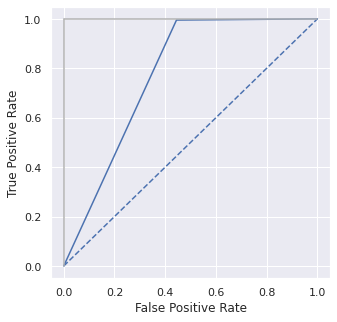

In [184]:
from sklearn.metrics import roc_curve, auc

false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_test, y_pred_ab)
auc_Adaboostclassifier = roc_auc_score(y_test, y_pred_ab)
#print(auc_Adaboostclassifier)
plt.subplots(1, figsize=(5,5))

plt.plot(false_positive_rate1, true_positive_rate1,)
plt.plot([0, 1], 'b--')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



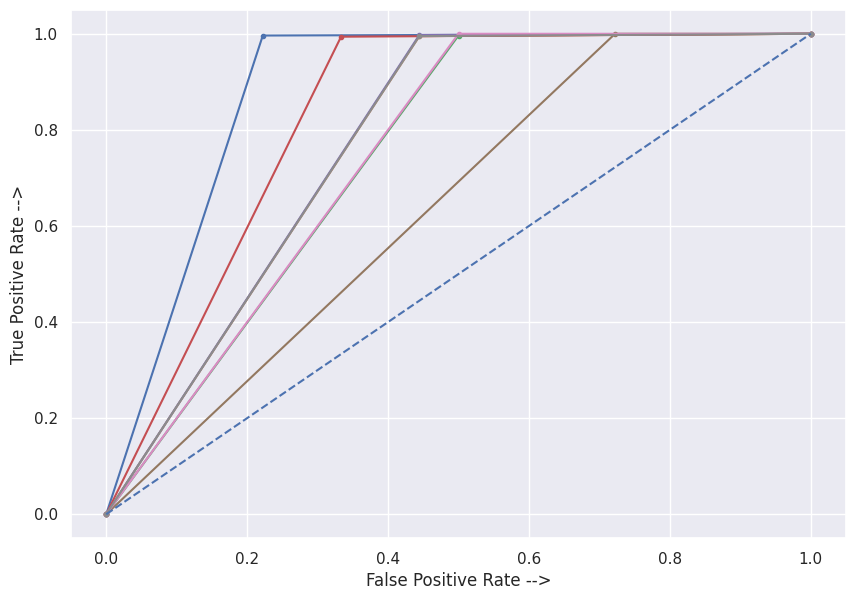

In [185]:
from sklearn.metrics import roc_curve, auc


false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_test, y_pred_dt)
auc_DecisionTree = auc(false_positive_rate1, true_positive_rate1)

RandomForest_fpr, RandomForest_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_RandomForest = auc(RandomForest_fpr, RandomForest_tpr)

GradientBoosting_fpr, GradientBoosting_tpr, threshold = roc_curve(y_test, y_pred_gb)
auc_GradientBoosting = auc(GradientBoosting_fpr, GradientBoosting_tpr)

eXtremeGradientBoost_fpr, eXtremeGradientBoost_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_eXtremeGradientBoost = auc(eXtremeGradientBoost_fpr, eXtremeGradientBoost_tpr)

SupportVectorMachine_fpr, SupportVectorMachine_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_SupportVectorMachine = auc(SupportVectorMachine_fpr, SupportVectorMachine_tpr)

MLPclassifier_fpr, MLPclassifier_tpr, threshold = roc_curve(y_test, y_pred_MLP)
auc_MLPclassifier = auc(MLPclassifier_fpr, MLPclassifier_tpr)

Adaboostclassifier_fpr, Adaboostclassifier_tpr, threshold = roc_curve(y_test, y_pred_ab)
auc_Adaboostclassifier = auc(Adaboostclassifier_fpr, Adaboostclassifier_tpr)

plt.figure(figsize=(10, 7), dpi=100)
plt.plot(DecisionTree_fpr, DecisionTree_tpr, marker='.', label='Decision Tree (auc = %0.3f)' % auc_DecisionTree)
plt.plot(RandomForest_fpr, RandomForest_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_RandomForest)
plt.plot(GradientBoosting_fpr, GradientBoosting_tpr, marker='.', label='Gradient Boosting (auc = %0.3f)' % auc_GradientBoosting)  
plt.plot(ExtratreeClassifer_fpr, ExtratreeClassifer_tpr, marker='.', label='Extra tree Classifer (auc = %0.3f)' % auc_ExtratreeClassifer)  
plt.plot(eXtremeGradientBoost_fpr, eXtremeGradientBoost_tpr, marker='.', label='eXtreme Gradient Boost (auc = %0.3f)' % auc_eXtremeGradientBoost) 
plt.plot(SupportVectorMachine_fpr, SupportVectorMachine_tpr, marker='.', label='Support Vector Machine (auc = %0.3f)' % auc_SupportVectorMachine)  
plt.plot(MLPclassifier_fpr, MLPclassifier_tpr, marker='.', label='MLP Classifier (auc = %0.3f)' % auc_MLPclassifier)  
plt.plot(Adaboostclassifier_fpr, Adaboostclassifier_tpr, marker='.', label='Ada boost classifier (auc = %0.3f)' % auc_Adaboostclassifier) 
plt.plot([0,1],[0,1],'b--')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

#plt.legend()
plt.show()

In [186]:
Evaluation = pd.DataFrame({'Ml': ['Logistic Regression', "Decision Tree", 'Random Forest',"Gradient Boosting",
                                     "Ada boost classifier","Xg boost classifier","Support Vector Machine",'NB',"K-nearest neighbor","Extra tree classifer",'MLP'], 
                          'Accuracy': [lr_acc*100, dt_accuracy*100,rf_accuracy*100, gb_accuracy*100, ab_accuracy*100,
                                       xg_accuracy*100, sv_accuracy*100,nb_accuracy*100,
                                     kn_accuracy*100,ET_accuracy*100,MLP_accuracy*100]})
Evaluation

,Ml,Accuracy
0,Logistic Regression,98.446834
1,Decision Tree,99.163680
2,Random Forest,98.566308
3,Gradient Boosting,98.566308
4,Ada boost classifier,98.566308
5,Xg boost classifier,98.805257
6,Support Vector Machine,98.446834
7,NB,98.566308
8,K-nearest neighbor,98.207885
9,Extra tree classifer,98.685783
